+ $P( >= dead | >= big )$

In [1]:
from knowknow import *

In [4]:
from load_db import db as dta

In [7]:
pdist = defaultdict(list)

for c in dta.items('c'):
    tt = dta.trend('c', c)
    for YY1 in range(tt.first, 2015-10-10):
        dec1 = tt.sum_between(YY1, YY1+9)
        
        for YY2 in range(YY1+10, 2015-10):
            dec2 = tt.sum_between(YY2, YY2+9)
            
            pdist[ (YY1,dec1) ].append( (YY2, dec2) )

KeyboardInterrupt: 

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([161.5, 161.6, 161.7, 161.8, 161.9, 162. , 162.1, 162.2, 162.3,
        162.4, 162.5]),
 <a list of 10 Patch objects>)

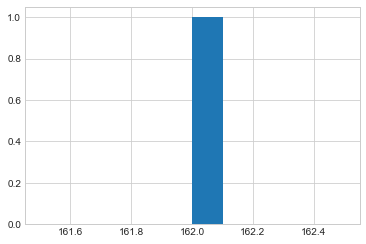

In [18]:
plt.hist([c for y,c in pdist[(1963,100)] if y==1985])

# just look for regions that are sparsely populated

In [19]:
points = []

for c in dta.items('c'):
    tt = dta.trend('c', c)
    for YY1 in range(tt.first, 2015-10-10):
        dec1 = tt.sum_between(YY1, YY1+9)
        
        for YY2 in range(YY1+10, 2015-10):
            dec2 = tt.sum_between(YY2, YY2+9)
            
            points.append([dec1, np.log(dec2/dec1), YY2 - YY1])

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


KeyboardInterrupt: 

In [23]:
from random import choice

In [26]:
YY1

1975

In [27]:
YY2

1997

In [28]:
tt.first

2002

In [56]:
points = []

for c in dta.items('c'):
    tt = dta.trend('c', c)
    if tt.first >= 2015-10-10:
        continue
    
    YY1 = choice( range(tt.first, 2015-10-10) )
    dec1 = tt.sum_between(YY1, YY1+9)

    YY2 = choice( range(YY1+10, 2015-10) )
    dec2 = tt.sum_between(YY2, YY2+9)
    
    if dec1 == 0:
        continue

    points.append([dec1, dec2/dec1, YY2 - YY1])

In [57]:
len(points)

39021

In [58]:
import seaborn as sns

In [59]:
points[:5]

[[3, 0.3333333333333333, 10],
 [6, 0.16666666666666666, 16],
 [4, 0.0, 10],
 [2, 0.0, 15],
 [1, 0.0, 10]]

In [52]:
x = 5

In [53]:
x

5

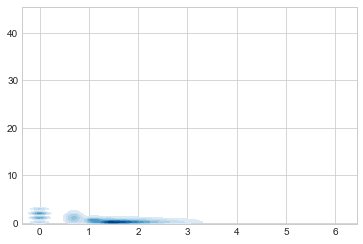

In [63]:
sns.kdeplot(
    np.log([x[0] for x in points]), 
    [x[1] for x in points], cmap="Blues", shade=True, shade_lowest=False)

(0.0, 1.0)

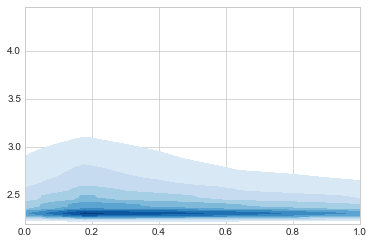

In [64]:
sns.kdeplot(
    [x[1] for x in points], 
    np.log([x[2] for x in points]), cmap="Blues", shade=True, shade_lowest=False)
plt.xlim(0,1)

In [69]:
points[:5]

[[3, 0.3333333333333333, 10],
 [6, 0.16666666666666666, 16],
 [4, 0.0, 10],
 [2, 0.0, 15],
 [1, 0.0, 10]]

In [70]:
myp = [x for x in points if x[0] >= 10]
myp = [x for x in myp if x[1] < 1 ]
#myp = [x for x in myp if x[2]  ]

# getting confused now :)

In [87]:
mat, brk1, brk2 = np.histogram2d(
    [x[0] for x in myp],
    [x[1] for x in myp],
    bins=[20,30]
)

In [83]:
brk1

array([ 10.  ,  31.35,  52.7 ,  74.05,  95.4 , 116.75, 138.1 , 159.45,
       180.8 , 202.15, 223.5 , 244.85, 266.2 , 287.55, 308.9 , 330.25,
       351.6 , 372.95, 394.3 , 415.65, 437.  ])

In [84]:
brk2

array([0.        , 0.03300971, 0.06601942, 0.09902913, 0.13203883,
       0.16504854, 0.19805825, 0.23106796, 0.26407767, 0.29708738,
       0.33009709, 0.3631068 , 0.3961165 , 0.42912621, 0.46213592,
       0.49514563, 0.52815534, 0.56116505, 0.59417476, 0.62718447,
       0.66019417, 0.69320388, 0.72621359, 0.7592233 , 0.79223301,
       0.82524272, 0.85825243, 0.89126214, 0.92427184, 0.95728155,
       0.99029126])

In [85]:
rsum = mat.sum(axis=1)
mat = mat / rsum[:,np.newaxis]

c:\users\amcga\envs\citation-deaths\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


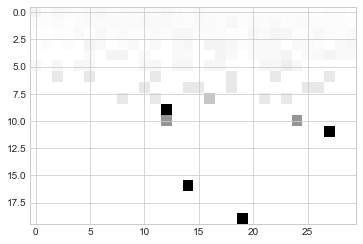

In [86]:
plt.imshow(mat)

In [88]:
rsum = mat.sum(axis=0)
mat = mat / rsum[np.newaxis,:]

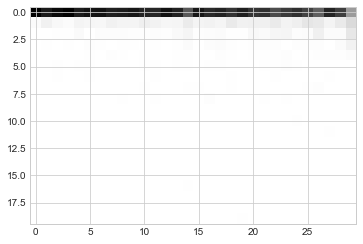

In [89]:
plt.imshow(mat)